#### Importar a Base de dados

In [61]:
import pandas as pd
tabela = pd.read_csv('advertising.csv')
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [40]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

### preparação dos dados para treinarmos o Modelo de Machine Learning
- Separando em dados de treino e dados de teste

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


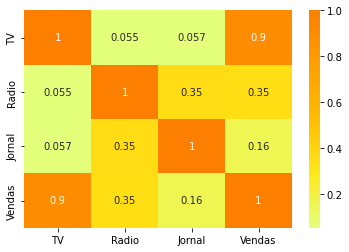

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

display(tabela.corr())
#criar o grafico com seaborn
sns.heatmap(tabela.corr(), cmap = 'Wistia', annot = True)
#exibindo o grafico com o matplotlib
plt.show()




### aplicando os dois modelos

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [46]:
# y -> vai prever as vendas
# x -> o resto do dataset (auxiliar na previsão e na correlação -1 a 1)
x = tabela[["TV", "Radio", "Jornal"]] 
y = tabela["Vendas"]
#aplicando o modelo de treino da documentação scikit learn
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#cria a IA
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()
#treina a IA
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

In [55]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)
from sklearn.metrics import r2_score
print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))


0.8965650453415397
0.9438256587511911


#### Visualização Gráfica das Previsões

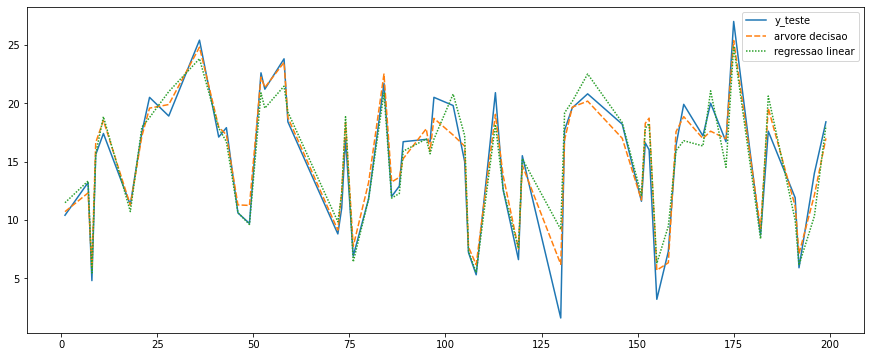

In [64]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar ['y_teste'] = y_teste
tabela_auxiliar ['arvore decisao'] = previsao_arvoredecisao
tabela_auxiliar ['regressao linear'] = previsao_regressaolinear

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### rascunho com outro database (ignorar)

In [31]:
novos = pd.read_csv('novos.csv')
display(novos)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [56]:
print(modelo_arvoredecisao.predict(novos))

[ 7.697  8.545 20.382]
